# Symulacje komputerowe - raport 1
### Michał Tokarski, Zofia Berbelska

### 1. Metoda odwracania dystrybuanty

Ogólny algorytm dla rozkładu dyskretnego:
1. Generuj $U\sim U(0,1)$
2. Wyznacz $j \in \{1,2,\dots\}$ takie, że $F_{X}(x_{j-1}) < U \le F_{X}(x_{j})$
3. Zwróć $X = x_{j}$

Oczywiście dla konkretnych przypadków możemy znaleźć szybszy lub też prostszy algorytm.

Implementacja powyższego algorytmu na kod wygląda następująco:

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, gamma
import statsmodels.api as sm
import math
import random
import scipy.stats as stats
import seaborn
import time

def simulate(n,wartości,prawd):
    """Generujemy wektor U(0,1) o rozmiarze n, a następnie zastępujemy poszczególne komórki spełniające warunek z punktu 2 algorytmu wartościami i.
    Warto zauważyć, że robimy to od końca, ponieważ w innym wypadku, ze względu na błędy numeryczne Pythona suma wszystkich prawdopodobieństw wychodzi minimalnie powyżej 1
     i wartości 1 zastępowane są wartościami n."""
    x = np.random.random(n)
    prawd_różn = 1
    for i in range(len(prawd)):
        prawd_różn = prawd_różn - prawd[-i-1]
        x[(prawd_różn<x) & (x<prawd_różn + prawd[-i-1])] = wartości[-i-1] 
    return x

Przykład: rozkład Poissona

Rozkład Poissona ma postać:
$p_{n} = P(X = n) = e^{\lambda}\frac{\lambda^n}{n!}$, gdzie $n \in \mathbb{N}$, $\lambda > 0$ \
Zauważmy, że $p_{n+1}=p_{n}\frac{\lambda}{n+1}$ \
Przejdźmy do Pythona: 

In [74]:
def Poisson_Quantile(n, lam, N):
  u = np.random.random(N)

  prob = np.e**(-lam)
  prob_suma = prob

  for i in range(0, n+1):
    if i == 0:
      u[u <= prob_suma] = n + 1 #zabezpieczamy n = 0
    else:
      u[u <= prob_suma] = i
    
    prob = prob * lam / (i+1)
    prob_suma += prob
  u[u == n+1] = 0


  return u

In [75]:
n = 10
N = 10000
lam = 1
X = Poisson_Quantile(n,lam,N)

In [76]:
M = []
for i in range(0, n+1):
    M.append(np.count_nonzero(X == i))
M = np.array(M)/10000
rv = poisson(1)
x = np.arange(poisson.ppf(0.001, lam),
              poisson.ppf(0.999, lam))

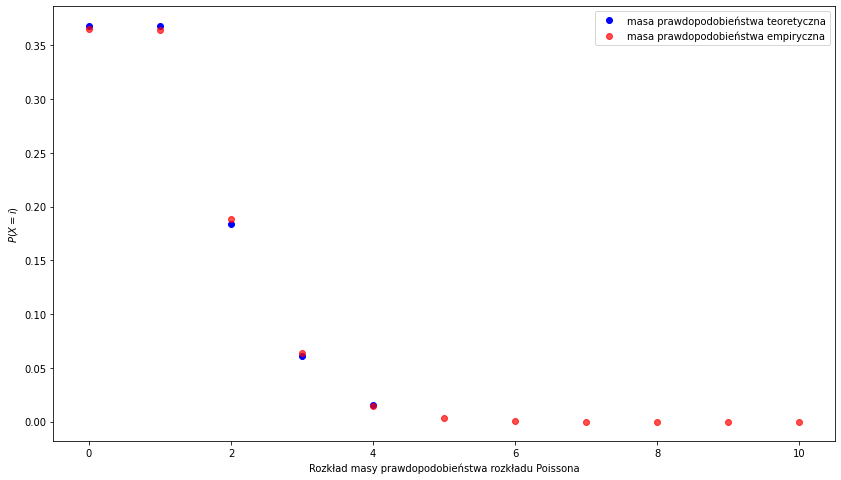

In [77]:
plt.figure(figsize=(14,8))
plt.plot(x, rv.pmf(x),'bo', label='masa prawdopodobieństwa teoretyczna')
plt.plot(np.arange(n+1),M,'ro', label='masa prawdopodobieństwa empiryczna', alpha=0.7)
plt.xlabel(f"Rozkład masy prawdopodobieństwa rozkładu Poissona")
plt.ylabel("$P(X=i)$")
plt.legend()

Text(0.5, 1.0, 'Porównanie dystrybuanty empirycznej i teoretycznej')

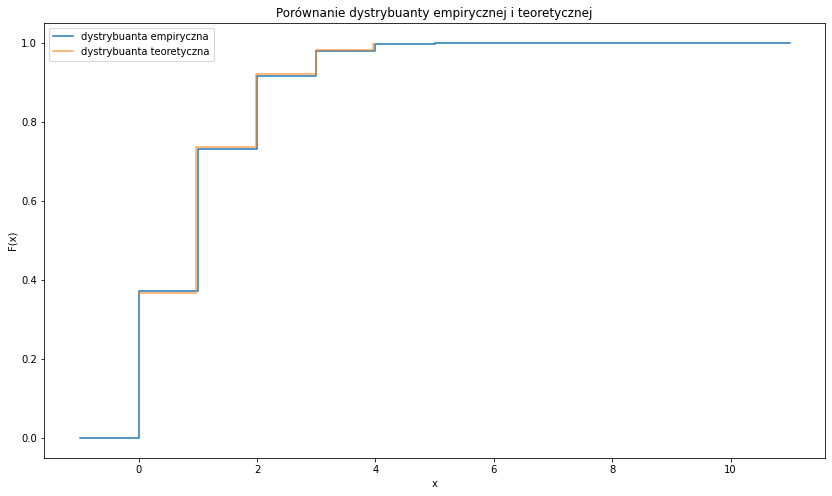

In [66]:
def dystrybuanta(X, num):
  X = [X[0]-1]+X+[X[-1]+1]
  Y = np.array([sum(num[:i+1]) for i in range(len(num))])
  Y = np.insert(Y, [0, 0], 0)
  return X, Y
n = len(M)
X = [i+1 for i in range(n)]
x = np.linspace(poisson.ppf(0.01, mu =1),
                poisson.ppf(0.99, mu = 1), 100)
X1, Y1 = dystrybuanta(X, M)
dist_theo = [poisson.cdf(i,1) for i in range(n)]
plt.figure(figsize=(14,8))
plt.step(np.array(X1)-1, Y1, label='dystrybuanta empiryczna')
plt.step(x, poisson.cdf(x, mu=1), label='dystrybuanta teoretyczna', alpha=0.7)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.title('Porównanie dystrybuanty empirycznej i teoretycznej')

In [82]:
M_mean = 0.36*1+0.19*2+0.064*3+0.0149*4+0.00034*5
M_mean

0.9933

In [84]:
M_var = 0.36*1**2+0.19*2**2+0.064*3**2+0.0149*4**2+0.00034*5**2 - M_mean**2
M_var

0.9562551100000002

In [68]:
poisson.mean(1)

1.0

In [70]:
poisson.var(1)

1.0

Widzimy tutaj jasno, że z otrzymanego generatora rzeczywiście otrzymujemy rozkład Poissona.

Ogólny algorytm dla rozkładu ciągłego:
1. Generuj $U \sim U(0,1)$
2. Wstaw $X = \inf\{x \in \mathbb{R} : F_{X}(x) \ge U\}$

Jeżeli X ma dystrybuantę ściślę rosnącą, to wtedy możemy, definiując $Y = F_{X}^{-1}(U)$ otrzymamy $Y \stackrel{d}= X$, zatem algorytm przybiera postać:
1. Wyznacz $F_{X}^{-1}$
2. Generuj $U \sim U(0,1)$
3. Wstaw $X = F_{X}^{-1}(U)$

Przykład: rozkład Cauchy'ego

Skorzystamy tutaj z wbudowanej funkcji z biblioteki scipy.stats


In [86]:
U = np.random.random(1000)
alpha = 2
X = gamma.ppf(U,alpha)

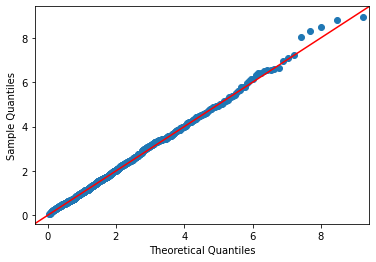

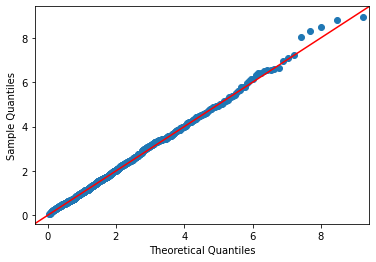

In [87]:
sm.qqplot(X, line ='45', dist = gamma(alpha))

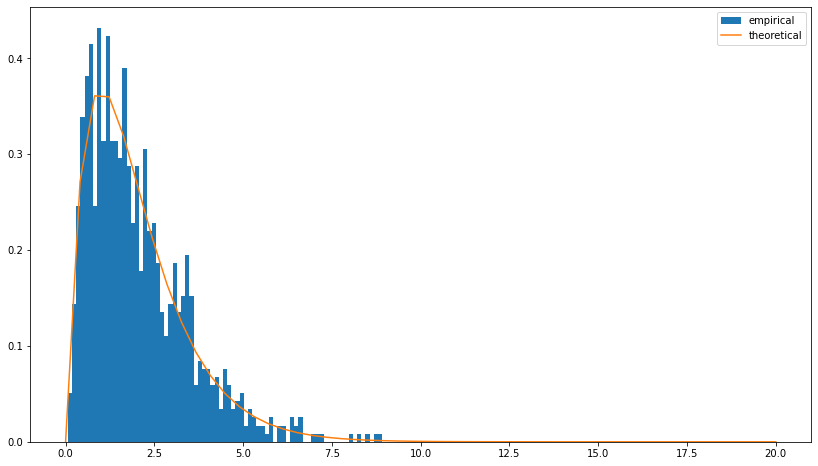

In [88]:
plt.figure(figsize=(14,8))
plt.hist(X,bins = 75, density=True, label="empirical")
x = np.linspace(0, 20)
plt.plot(x, gamma.pdf(x, 2), label = 'theoretical')
plt.legend()

In [91]:
X.mean()

2.033521495961694

In [90]:
X.var()

2.003201573837842

In [93]:
gamma.var(2)

2.0

In [95]:
gamma.mean(2)

2.0

In [ ]:
cdfx = np.sort(X)
x_val = np.linspace(start=min(cdfx),stop=max(cdfx),num=len(cdfx))
size = X.size
y_val = []
for i in x_val:
    temp = X[X <= i]
    value = temp.size / size
    y_val.append(value)

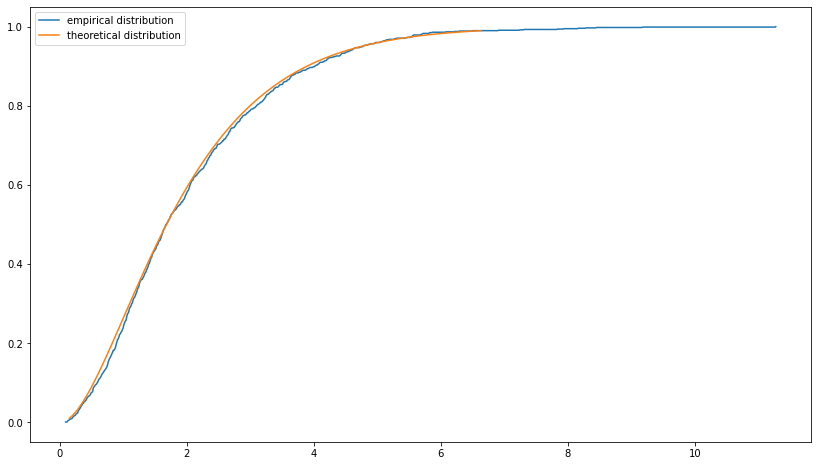

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(x_val,np.array(y_val), label = "empirical distribution")
x = np.linspace(gamma.ppf(0.01,alpha),
                gamma.ppf(0.99,alpha), 100)
plt.plot(x, gamma.cdf(x,alpha), label = 'theoretical distribution')
plt.legend()

Tak jak poprzednio, wszystko się zgadza

### 2. Metoda akceptacji-odrzucenia

Znowu, najpierw rozważając przypadek rozkładu dyskretnego. Algorytm to:

1. Generuj Y, będący zmienną losową o znanym rozkładzie dyskretnym
2. Generuj $U \sim U(0,1)$
3. Jeśli $ U \leq \frac{p_{Y}}{c q_{Y}}$ (gdzie $\max{\frac{p_{i}}{q_{i}}}\leq c$) zwróć $X = Y$. W przeciwynm razie wróć do 1. \
Oczywiście najopytymalniej jest wybrać $c = \max{\frac{p_{i}}{q_{i}}}$

Przykład
Weźmy rozkład dyskretny o prawdopodobieństwach:

In [96]:
prob_dist = [{"value":0,"probability":0.20},
             {"value":1,"probability":0.30},
             {"value":2,"probability":0.10},
             {"value":3,"probability":0.17},
             {"value":4,"probability":0.23}
             ]

Ogólna implementacja dla zadanego prawdopodobieństwa i wartości będzie wyglądała następująco:

In [97]:
def draw_from_non_uniform_distribution(probability_distribution):

    member_count = len(probability_distribution)
    step_size = 1.00 / (member_count * 1.00)

    accept = False
    r_value = 0
    r_probability = 0

    while accept == False:
        r_temp = random.random()

        bin = math.ceil(r_temp / step_size)
        binned_object = probability_distribution[bin - 1]
        r_value = binned_object['value']
        r_probability = binned_object['probability']
        s = random.random()

        if (s <= r_probability):
            accept = True
        else:
            accept = False

    return r_value

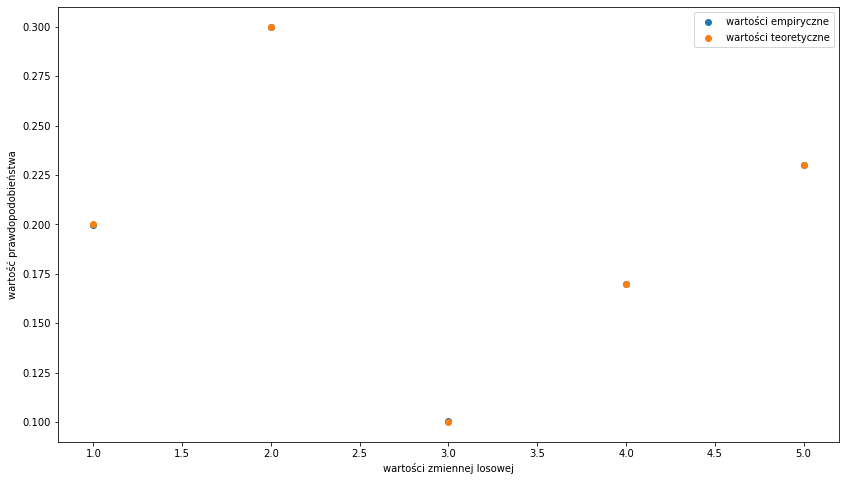

In [98]:
bins = {}
n = 100000
for i in range(n):

    r_value = draw_from_non_uniform_distribution(prob_dist)

    if (bins.get(r_value) != None):
        bins[r_value] += 1
    else:
        bins[r_value] = 1

myKeys = list(bins.keys())
myKeys.sort()
sorted_bins = {i: bins[i] for i in myKeys}
sorted_bins_values = list(sorted_bins.values())
sorted_bins_values_prob = np.array(sorted_bins_values)/n
plt.figure(figsize=(14,8))
plt.scatter(np.arange(1,6,1),sorted_bins_values_prob, label='wartości empiryczne')
plt.scatter(np.arange(1,6,1),[0.2,0.3,0.1,0.17,0.23], label = 'wartości teoretyczne')
plt.xlabel("wartości zmiennej losowej")
plt.ylabel("wartość prawdopodobieństwa")
plt.legend()
plt.show()

In [99]:
x_val = np.linspace(start=min(sorted_bins_values_prob),stop=max(sorted_bins_values_prob),num=len(sorted_bins_values_prob))
size = sorted_bins_values_prob.size
y_val = []
for i in x_val:
    temp = sorted_bins_values_prob[sorted_bins_values_prob <= i]
    value = temp.size / size
    y_val.append(value)

sorted_bins_values_prob

array([0.19955, 0.3    , 0.10053, 0.16989, 0.23003])

Text(0.5, 1.0, 'Porównanie dystrybuanty empirycznej i teoretycznej')

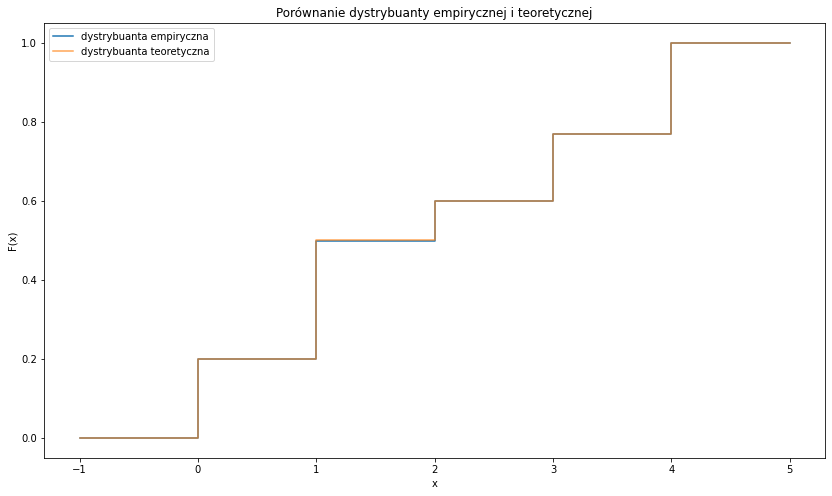

In [101]:
def dystrybuanta(X, num):
  X = [X[0]-1]+X+[X[-1]+1]
  Y = np.array([sum(num[:i+1]) for i in range(len(num))])
  Y = np.insert(Y, [0, 0], 0)
  return X, Y
n = len(sorted_bins_values_prob)
X = [i+1 for i in range(n)]
X2, Y2 = dystrybuanta(X, sorted_bins_values_prob)
Xt2, Yt2 = dystrybuanta(X, [0.2,0.3,0.1,0.17,0.23])

plt.figure(figsize=(14,8))
plt.step(np.array(X2)-1, Y2, label='dystrybuanta empiryczna')
plt.step(np.array(Xt2)-1, Yt2, label='dystrybuanta teoretyczna', alpha=0.7)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.title('Porównanie dystrybuanty empirycznej i teoretycznej')

Jeżeli chodzi o rozkład ciągły, sprawa prezentuje się następująco:

Najpierw zakładamy, że potrafimy efektywnie generować inną zmienną losową $Y$ o gęstości $g(x)$. X i Y muszą przyjmować wartości z tego samego zbioru. Dodatkowo potrafimy wyznaczyć stałą c taką, że $\sup_{x \in \mathbb{R}}{\frac{f(x)}{g(x)}} \leq c < \inf$ (zakładamy także, że w tym wypadku $\frac{0}{0} = 0$). Wtedy algorytm generowania rozkładu X można zapisać jako: \
1. Wygeneruj $Y$
2. Generuj $U \sim U(0,1)$, oraz niech $U$ i $Y$ będą niezależne
3. Jeśli $U \leq \frac{f(Y)}{c g(Y)}$ zwróć $X = Y$. W przeciwnym razie wróć do 1.

Przykład: Rozkład normalny przy użyciu rozkładu wykładniczego

## Czy tutaj nie można wrzucić tego samego co w podpunkcie trzecim zrobiłaś? xDD

Wartość teoretyczna średniej: 1
Wartość wyestymowana: 1.0231716266896906
Wartość teoretyczna wariancji: 4
Wartość wyestymowana: 3.990035281813091
Wartość teoretyczna skośności: 0
Wartość wyestymowana: -0.022099978548525738
Wartość teoretyczna kurtozy: 0
Wartość wyestymowana: -0.05838027301155835


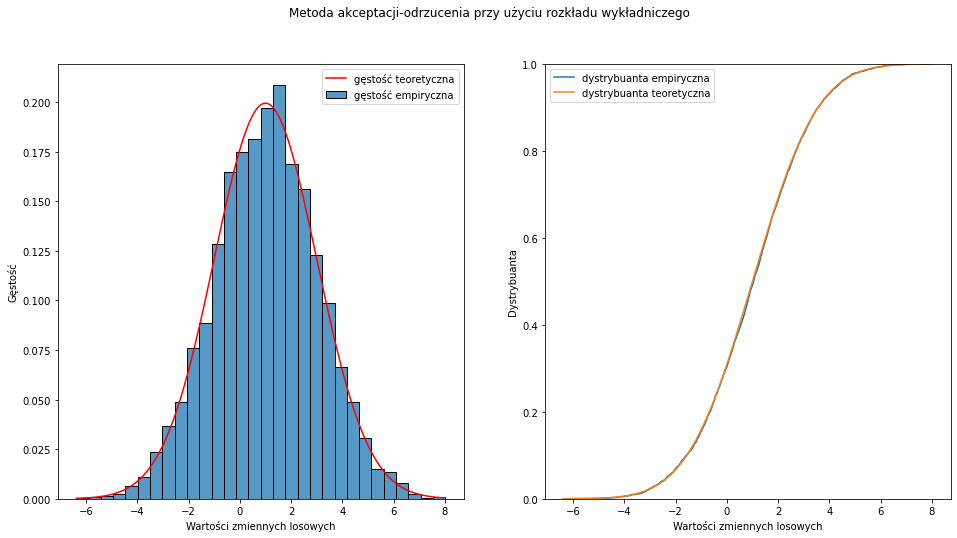

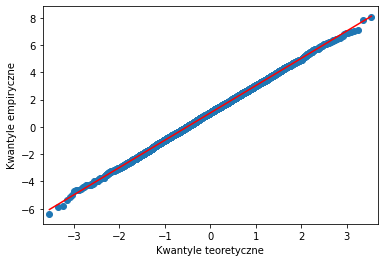

In [104]:
def g(x):                #gęstość Y (rozkład pomocniczy - wykładniczy)
    g = np.exp(-x)
    return g

def f(x):                #gęstość X (rozkład N(0,1))
    f = 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)
    return f

def AO(n, μ, sig): 
    start = time.time()
    c = np.sqrt(2*np.exp(1)/np.pi)
    xy = np.empty(n)
    for i in range(n):
        while 1:
            y = np.random.exponential(1)
            u = np.random.random()
            if u <= f(y)/(c*g(y)):
                u = np.random.random()
                if u > 1/2:
                    y = -y
                xy[i] = y*sig+μ   #dowolny rozkład normalny
                break
    stop = time.time()
    t = stop - start
    return xy, t

n = 5000
μ, sig = 1, 2

t_AO = []
for i in range(5000,100001,5000):
    t_AO.append(AO(i, μ, sig)[1])
    
v = AO(n, μ, sig)[0]
x = np.linspace(min(v), max(v), 1000)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
seaborn.histplot(v, stat = "density", bins = 30, label = "gęstość empiryczna")
f = stats.norm.pdf(x, μ, sig)
plt.plot(x, f, color = "red", label = "gęstość teoretyczna")
plt.xlabel("Wartości zmiennych losowych")
plt.ylabel("Gęstość")
plt.legend()

plt.subplot(1,2,2)
seaborn.ecdfplot(v, label = "dystrybuanta empiryczna")                     
F = stats.norm.cdf(x, μ, sig)
plt.plot(x, F, label = "dystrybuanta teoretyczna")
plt.xlabel("Wartości zmiennych losowych")
plt.ylabel("Dystrybuanta")
plt.legend()
plt.suptitle("Metoda akceptacji-odrzucenia przy użyciu rozkładu wykładniczego")

sm.qqplot(v, line = "r")
plt.xlabel("Kwantyle teoretyczne")
plt.ylabel("Kwantyle empiryczne")

print("Wartość teoretyczna średniej: %s" % μ)
print("Wartość wyestymowana: %s" % np.mean(v))

print("Wartość teoretyczna wariancji: %s" % sig**2)
print("Wartość wyestymowana: %s" % np.var(v))

print("Wartość teoretyczna skośności: 0")
print("Wartość wyestymowana: %s" % stats.skew(v))

print("Wartość teoretyczna kurtozy: 0")
print("Wartość wyestymowana: %s" % stats.kurtosis(v))

Wartość teoretyczna średniej: 1
Wartość wyestymowana: 0.973535121482744
Wartość teoretyczna wariancji: 4
Wartość wyestymowana: 4.054293693345238
Wartość teoretyczna skośności: 0
Wartość wyestymowana: 0.03652739590621791
Wartość teoretyczna kurtozy: 0
Wartość wyestymowana: 0.08031565826229148


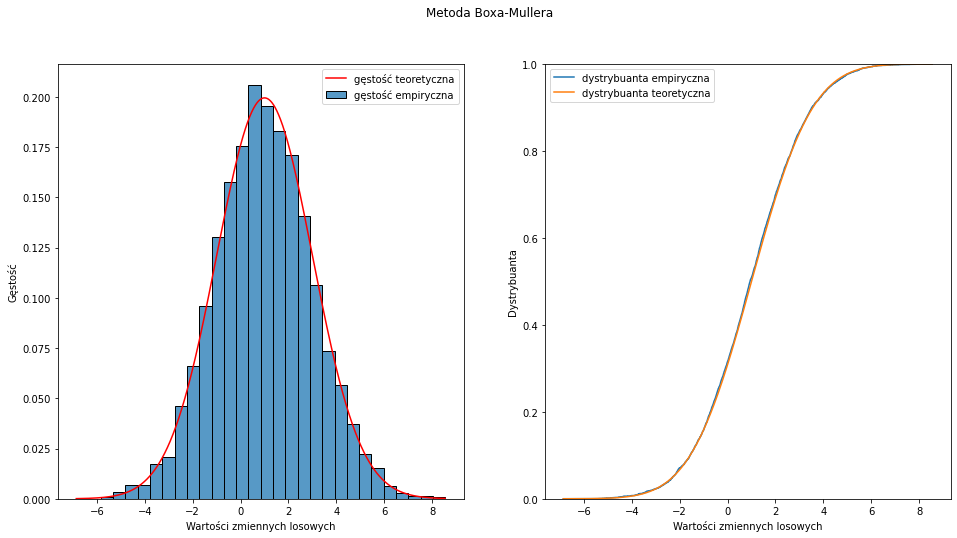

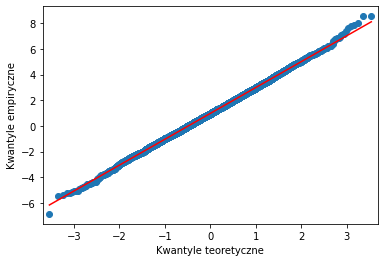

In [105]:
def BM(n, μ, sig):
    start = time.time()
    X = np.empty(n)
    Y = np.empty(n)
    for i in range(n):
        u1 = np.random.random()
        u2 = np.random.random()
        X[i] = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
        Y[i] = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    r = X*sig+μ
    stop = time.time()
    t = stop - start
    return r, t

n = 5000
μ, sig = 1, 2

t_BM = []
for i in range(5000,100001,5000):
    t_BM.append(BM(i, μ, sig)[1])

v = BM(n, μ, sig)[0]
x = np.linspace(min(v), max(v), 1000)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
seaborn.histplot(v, stat = "density", bins = 30, label = "gęstość empiryczna")
f = stats.norm.pdf(x, μ, sig)
plt.plot(x, f, color = "red", label = "gęstość teoretyczna")
plt.xlabel("Wartości zmiennych losowych")
plt.ylabel("Gęstość")
plt.legend()

plt.subplot(1,2,2)
seaborn.ecdfplot(v, label = "dystrybuanta empiryczna")                     
F = stats.norm.cdf(x, μ, sig)
plt.plot(x, F, label = "dystrybuanta teoretyczna")
plt.xlabel("Wartości zmiennych losowych")
plt.ylabel("Dystrybuanta")
plt.legend()
plt.suptitle("Metoda Boxa-Mullera")

sm.qqplot(v, line = "r")
plt.xlabel("Kwantyle teoretyczne")
plt.ylabel("Kwantyle empiryczne")

print("Wartość teoretyczna średniej: %s" % μ)
print("Wartość wyestymowana: %s" % np.mean(v))

print("Wartość teoretyczna wariancji: %s" % sig**2)
print("Wartość wyestymowana: %s" % np.var(v))

print("Wartość teoretyczna skośności: 0")
print("Wartość wyestymowana: %s" % stats.skew(v))

print("Wartość teoretyczna kurtozy: 0")
print("Wartość wyestymowana: %s" % stats.kurtosis(v))

Wartość teoretyczna średniej: 1
Wartość wyestymowana: 1.0117493672818112
Wartość teoretyczna wariancji: 4
Wartość wyestymowana: 3.9824759342697087
Wartość teoretyczna skośności: 0
Wartość wyestymowana: 0.017645977135262152
Wartość teoretyczna kurtozy: 0
Wartość wyestymowana: -0.05872828167114408


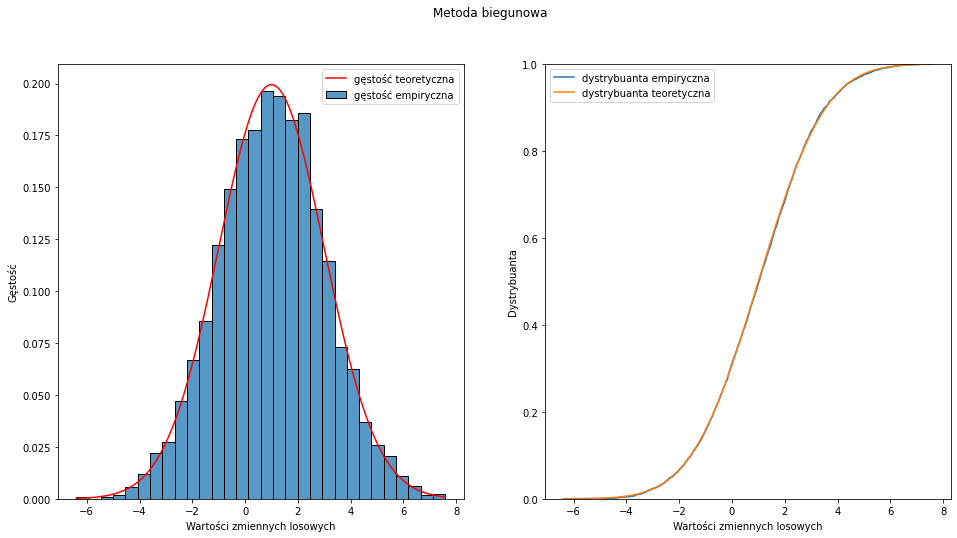

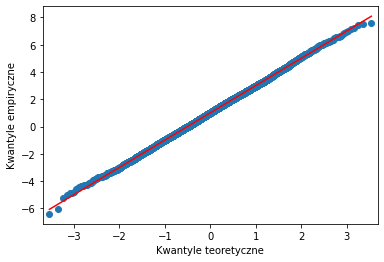

In [106]:
def bieg(n, μ, sig):
    start = time.time()
    R2 = np.empty(n)
    for i in range(n):
        v1 = np.random.random()
        v2 = np.random.random()
        while v1**2 + v2**2 > 1:
            v1 = np.random.random()
            v2 = np.random.random()
        R2[i] = v1**2 + v2**2
    X = np.sqrt(-2*np.log(R2)/R2)*v1
    Y = np.sqrt(-2*np.log(R2)/R2)*v2
    r = X*sig+μ
    stop = time.time()
    t = stop - start
    return r, t

n = 5000
μ, sig = 1, 2

t_bieg = []
for i in range(5000,100001,5000):
    t_bieg.append(bieg(i, μ, sig)[1])

v = BM(n, μ, sig)[0]
x = np.linspace(min(v), max(v), 1000)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
seaborn.histplot(v, stat = "density", bins = 30, label = "gęstość empiryczna")
f = stats.norm.pdf(x, μ, sig)
plt.plot(x, f, color = "red", label = "gęstość teoretyczna")
plt.xlabel("Wartości zmiennych losowych")
plt.ylabel("Gęstość")
plt.legend()

plt.subplot(1,2,2)
seaborn.ecdfplot(v, label = "dystrybuanta empiryczna")                     
F = stats.norm.cdf(x, μ, sig)
plt.plot(x, F, label = "dystrybuanta teoretyczna")
plt.xlabel("Wartości zmiennych losowych")
plt.ylabel("Dystrybuanta")
plt.legend()
plt.suptitle("Metoda biegunowa")

sm.qqplot(v, line = "r")
plt.xlabel("Kwantyle teoretyczne")
plt.ylabel("Kwantyle empiryczne")

print("Wartość teoretyczna średniej: %s" % μ)
print("Wartość wyestymowana: %s" % np.mean(v))

print("Wartość teoretyczna wariancji: %s" % sig**2)
print("Wartość wyestymowana: %s" % np.var(v))

print("Wartość teoretyczna skośności: 0")
print("Wartość wyestymowana: %s" % stats.skew(v))

print("Wartość teoretyczna kurtozy: 0")
print("Wartość wyestymowana: %s" % stats.kurtosis(v))


Porównanie generatorów rozkładu normalnego ze względu na czas ich działania w zależności od długości
wysymulowanej próbki.

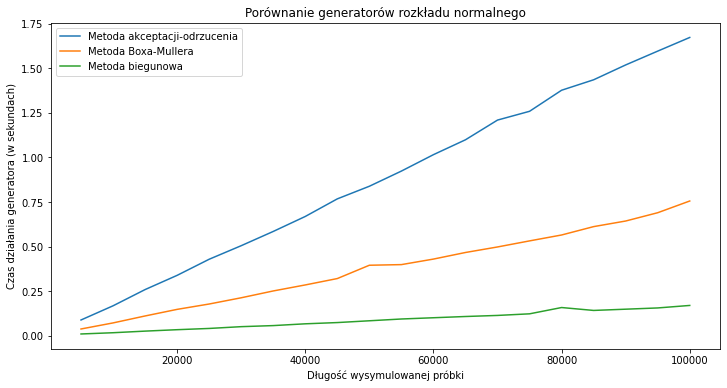

In [107]:
x = np.arange(5000,100001,5000)

plt.figure(figsize=(12,6))
plt.plot(x, t_AO, label = "Metoda akceptacji-odrzucenia")
plt.plot(x, t_BM, label = "Metoda Boxa-Mullera")
plt.plot(x, t_bieg, label = "Metoda biegunowa")
plt.xlabel("Długość wysymulowanej próbki")
plt.ylabel("Czas działania generatora (w sekundach)")
plt.title("Porównanie generatorów rozkładu normalnego")
plt.legend()
plt.show()

Metoda Ziggurata

Naszym zadaniem jest wygenerować rozkład Pareta używając metody Ziggurata

Gęstość rozkładu Pareta dla $x_{m} = 1$ oraz $k = 2$ ma postać $f(x) = \frac{2}{x^3}$

In [114]:
k = 2
xm = 1
eps = 0.00001
a = xm
b = xm*10
f = lambda x :  k/(x**(k+1))

def bisec(fun,a,b,eps):
    low, high = a, b
    feps = 10e-16 #dokładność, z jaką przyrównamy f(x) do 0
    if fun(low)*fun(high) > 0:
        print("Podano błędny przedział!")
        return
    while abs(low-high)>eps:    
        midpoint = (low + high)/2
    if abs(fun(midpoint)) < feps : #sprawdź, czy to rozwiązanie
        return midpoint
    if fun(low)*fun(midpoint)>0:
        low = midpoint
    else:
        high = midpoint
        return midpoint
def r_func(r):
    v = r * f(r) + (1/r)**k
    x_1 = r *f(r)
    return abs(v - x_1 + x_1 * f(x_1)) - eps

In [115]:
bisec(f,a,b,eps)

Podano błędny przedział!
